In [1]:
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
import re
from time import time
from scipy import stats
import json

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

Populating the interactive namespace from numpy and matplotlib


In [2]:
!pwd

/root/shared/Desktop/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission


## Loading the Data

In [3]:
application_test = pd.read_csv('/root/shared/Desktop/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission/application_test.csv')
application_train = pd.read_csv('/root/shared/Desktop/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission/application_train.csv')
# bureau = pd.read_csv('bureau.csv')
# bureau_balance = pd.read_csv('bureau_balance.csv')
# credit_card_balance = pd.read_csv('credit_card_balance.csv')
# HomeCredit_columns_description = pd.read_csv('./Data-HCDR/HomeCredit_columns_description.csv')
# installments_payments = pd.read_csv('installments_payments.csv')
# POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')
# previous_application = pd.read_csv('previous_application.csv')
# sample_submission = pd.read_csv('sample_submission.csv')

A function to return disjoint index subsets for the data

In [4]:
# Ref : https://stackoverflow.com/questions/45985877/slicing-multiple-column-ranges-from-a-dataframe-using-iloc

# Create a custom function for indexing
def all_nums_in_range(*tuple_pairs, len_df):
    """
    Input pairs of tuples for index slicing

    Include `len_df` to ensure length of array matches indexed df
    """

    # Create an array with values to use as an index
    num_range = np.zeros(shape=(len_df,), dtype=bool)

    # Update
    for (start, end) in tuple_pairs:
        num_range[start:end] = True

    return num_range

While exploring the training data we noticed that a majority of the columns related to housing details of individuals, since the data was massive and making the process of profiling timetaking we decided to focus on columns that are related to factors othewr than the housing details

In [5]:
# !pip install pandas-profiling

In [6]:
# from pandas_profiling import ProfileReport
# profiling_report = ProfileReport(application_train.iloc[:,all_nums_in_range((1,43),(115,121),(0,1),len_df = application_train.shape[1])], title='HomeCredit Dataset pandas profiling of non-housing related columns', explorative = True)

## Pandas Profiling

### Add insights/key takeaways from the pandas profiling of the application_train.csv data (Pending)

...

...

...


In [7]:
def basic_df_eda(df,df_name):
    print('Basic stats for the dataframe : {}'.format(df_name))
    print('------------------------------------------------------------------------------------------------------------------')
    print('Columns stats & Datatypes')
    display(df.info(verbose=True,null_counts=True))
    print('------------------------------------------------------------------------------------------------------------------')
    print('')
    print('Columnwise summary statistics')
    display(df.describe())
    print('------------------------------------------------------------------------------------------------------------------')
    print('')
    print('Distinct values in each column')
    display(df.apply(lambda x: x.nunique()))
    print('------------------------------------------------------------------------------------------------------------------')
    print('Percentage missing values')
    display(df.isnull().sum() * 100 / len(df))
    
    

In [8]:
basic_df_eda(application_train,'Application Train')

Basic stats for the dataframe : Application Train
------------------------------------------------------------------------------------------------------------------
Columns stats & Datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY         

None

------------------------------------------------------------------------------------------------------------------

Columnwise summary statistics


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

------------------------------------------------------------------------------------------------------------------

Distinct values in each column


SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

------------------------------------------------------------------------------------------------------------------
Percentage missing values


SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [9]:
!pip install datatile

In [10]:
from datatile.summary.df import DataFrameSummary

In [11]:
Summary_df = DataFrameSummary(application_train)

In [12]:
Summary_df.summary()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0,307511.0,NaN,NaN,NaN,NaN,307511.0,307511.0,307511.0,307499.0,307233.0,NaN,NaN,NaN,NaN,NaN,307511.0,307511.0,307511.0,307511.0,307511.0,104582.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,NaN,307509.0,307511.0,307511.0,NaN,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,NaN,134133.0,306851.0,246546.0,151450.0,127568.0,157504.0,103023.0,92646.0,143620.0,152683.0,154491.0,98869.0,124921.0,97312.0,153161.0,93997.0,137829.0,151450.0,127568.0,157504.0,103023.0,92646.0,143620.0,152683.0,154491.0,98869.0,124921.0,97312.0,153161.0,93997.0,137829.0,151450.0,127568.0,157504.0,103023.0,92646.0,143620.0,152683.0,154491.0,98869.0,124921.0,97312.0,153161.0,93997.0,137829.0,NaN,NaN,159080.0,NaN,NaN,306490.0,306490.0,306490.0,306490.0,307510.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,265992.0,265992.0,265992.0,265992.0,265992.0,265992.0
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,168797.919297,599025.999706,27108.573909,538396.207429,NaN,NaN,NaN,NaN,NaN,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.05672,NaN,2.152665,2.052463,2.031521,NaN,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,NaN,0.50213,0.514393,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.07449,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.11785,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,NaN,NaN,0.102547,NaN,NaN,1.42

### A breakdown of the defaulters with respect to genders

In [13]:
df_gender = application_train[['CODE_GENDER','TARGET']]
df_gender['count'] = 1
df_gender = df_gender.groupby(['CODE_GENDER','TARGET']).sum()
df_gender = pd.DataFrame(df_gender.reset_index())
display(df_gender)

,CODE_GENDER,TARGET,count
0,F,0,188278
1,F,1,14170
2,M,0,94404
3,M,1,10655
4,XNA,0,4


In [14]:
list(df_gender[df_gender['CODE_GENDER']=='F']['count'].values)

[188278, 14170]

In [15]:
df_gender.head()

,CODE_GENDER,TARGET,count
0,F,0,188278
1,F,1,14170
2,M,0,94404
3,M,1,10655
4,XNA,0,4


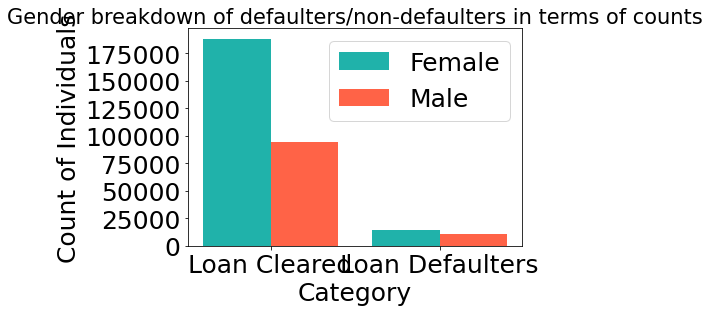

In [16]:
x = ['Loan Cleared','Loan Defaulters']
yF = [int(df_gender[(df_gender['CODE_GENDER']=='F') & (df_gender['TARGET']==0)]['count'].values),int(df_gender[(df_gender['CODE_GENDER']=='F') & (df_gender['TARGET']==1)]['count'].values)]
yM = [int(df_gender[(df_gender['CODE_GENDER']=='M') & (df_gender['TARGET']==0)]['count'].values),int(df_gender[(df_gender['CODE_GENDER']=='M') & (df_gender['TARGET']==1)]['count'].values)]
  


X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, yF, 0.4, label = 'Female',color =['lightseagreen'],)
plt.bar(X_axis + 0.2, yM, 0.4, label = 'Male',color =['tomato'])
  
plt.xticks(X_axis, x,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Category",fontsize=25)
plt.ylabel("Count of Individuals",fontsize=25)
plt.title("Gender breakdown of defaulters/non-defaulters in terms of counts",fontsize=21)

plt.legend(fontsize=25)
plt.show()


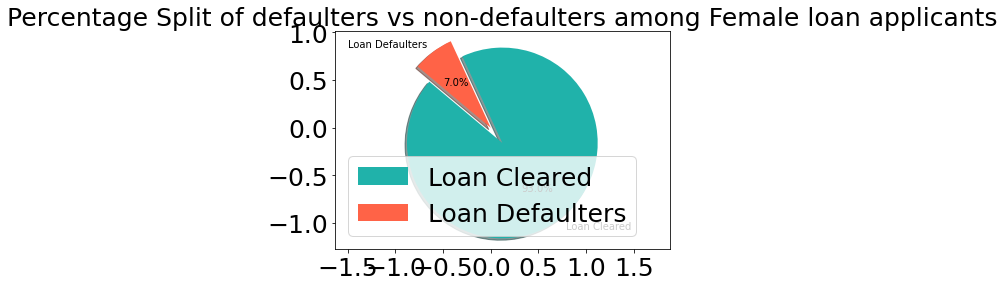

In [17]:
# Data to plot
labels = ['Loan Cleared','Loan Defaulters']
sizes = [df_gender[df_gender['CODE_GENDER']=='F']['TARGET']]
colors = ['lightseagreen', 'tomato']
explode = (0.2, 0)  # explode 1st slice

# Plot
plt.pie(list(df_gender[df_gender['CODE_GENDER']=='F']['count'].values), explode=explode,radius=1, frame=True,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.legend(fontsize=25)
plt.title('Percentage Split of defaulters vs non-defaulters among Female loan applicants',fontsize=25
         )
plt.show()

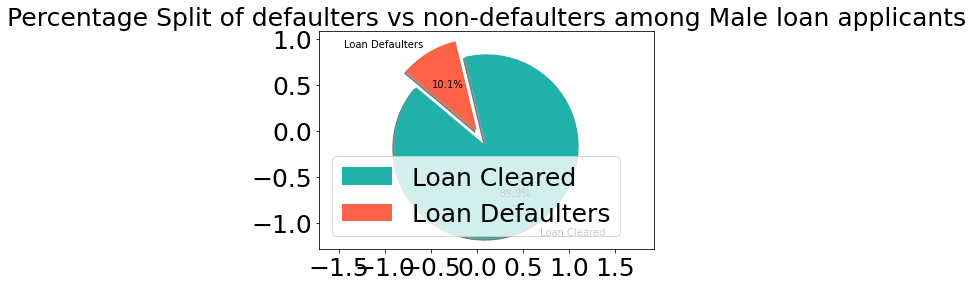

In [18]:
# Data to plot
labels = ['Loan Cleared','Loan Defaulters']
sizes = [df_gender[df_gender['CODE_GENDER']=='M']['TARGET']]
color =['lightseagreen', 'tomato']
explode = (0.2, 0)  # explode 1st slice

# Plot
plt.pie(list(df_gender[df_gender['CODE_GENDER']=='M']['count'].values), explode=explode, frame=True,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.axis('equal')
plt.legend(fontsize=25)
plt.title('Percentage Split of defaulters vs non-defaulters among Male loan applicants',fontsize=25)
plt.show()

### Based on the above visualizations we see that there are a much larger number of Women who have cleared their loans and in terms of of percentage split across the genders women are more likely to clear their loans than men

### Let us now add their income to the mix and understand how that impacts individual's ability to payback their loans

In [19]:
df_gender_income = application_train[['CODE_GENDER','AMT_INCOME_TOTAL','TARGET']]

In [20]:
df_gender_income.head()
df_gender_income = df_gender_income[df_gender_income['CODE_GENDER']!='XNA']
# df_gender_income.loc[df_gender_income['TARGET']==0] = 'Cleared'
# df_gender_income.loc[df_gender_income['TARGET']==1] = 'Defaulted'

[Text(0, 0, 'Cleared'), Text(1, 0, 'Defaulted')]

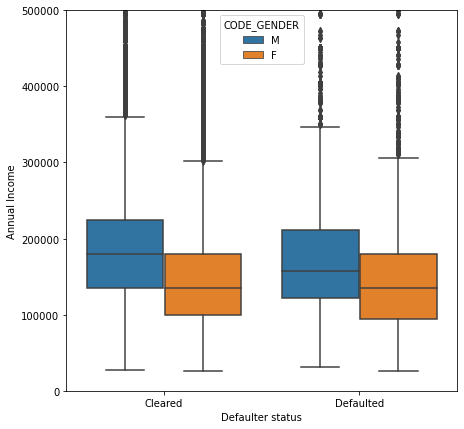

In [21]:
# https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots
import seaborn as sns
fig,ax = plt.subplots(figsize = (7,7))
g = sns.boxplot(x='TARGET',y='AMT_INCOME_TOTAL',hue='CODE_GENDER',data=df_gender_income)
plt.xlabel('Defaulter status')
plt.ylabel('Annual Income')
plt.ylim(0, 500000)
g.set_xticklabels(['Cleared','Defaulted'])

### An interesting observation here is that despite the fact that women earn lower on an average - even significantly lesser than men who have defaulted - they still manage to clear loans. 
### Looking at the boxplot, it almost seems as though income is not a major factor that affects Women's ability to clear a loan ( when it should be the case logically speaking, as we can see in the case of men where men with a lower income are more likely to default on their loan )

### Next we will try understanding how a person's financial status correlate with factors such as the family size, number of children, size of house, their loan size, age .etc.

In [22]:
corr_cols = ['CNT_CHILDREN','AMT_CREDIT','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','CNT_CHILDREN','YEARS_BUILD_MODE','TOTALAREA_MODE','TARGET']
df_corr = application_train[corr_cols]

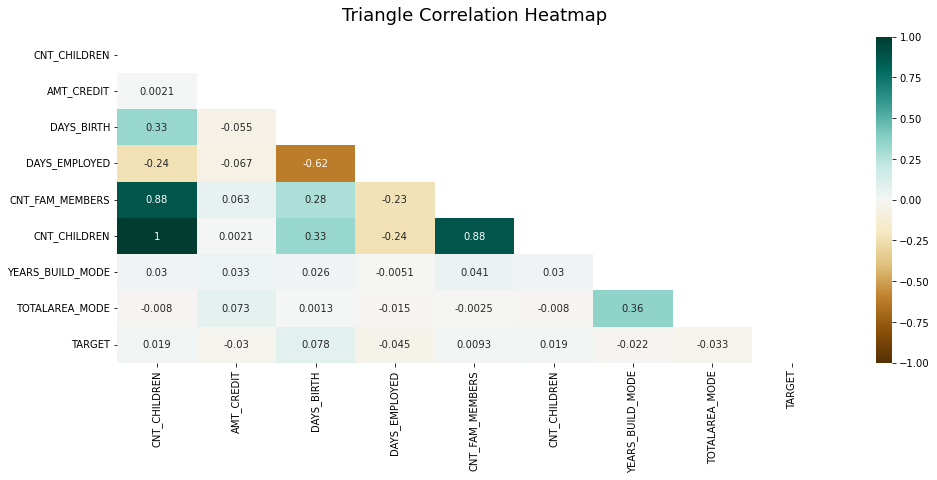

In [23]:
# Ref : https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_corr.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_corr.corr(), mask=mask, vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### There seem to be no meaningful insights from the above correlation plot

### Does owning a car make a difference ? 

In [24]:
df_car = application_train[['FLAG_OWN_CAR','TARGET']]

df_car = df_car.value_counts().reset_index(name='Count')

df_car

,FLAG_OWN_CAR,TARGET,Count
0,N,0,185675
1,Y,0,97011
2,N,1,17249
3,Y,1,7576


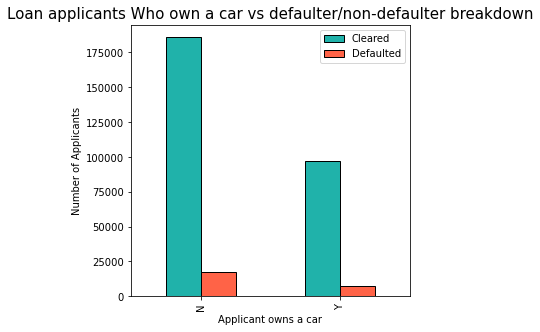

In [25]:

pivot = pd.pivot(data=df_car,index=['FLAG_OWN_CAR'],columns=['TARGET'],values='Count')
#ref : https://medium.com/@jb.ranchana/easy-way-to-create-stacked-bar-graphs-from-dataframe-19cc97c86fe3
ax = pivot.plot.bar(color =['lightseagreen', 'tomato'], figsize=(5,5),width=0.5,edgecolor='black')
ax.set_title('Loan applicants Who own a car vs defaulter/non-defaulter breakdown', fontsize=15)
# ax.xlabel('Applicant Occupation Type')
# ax.xlabel('Number of Applicants')
ax.set(xlabel='Applicant owns a car', ylabel='Number of Applicants')
ax.legend(['Cleared','Defaulted'])

# ax.show()

### One clear thing we can observe here is that applicants without a vehicle tend to apply for loans more than those who own one, but in terms of the defaulters it does not seem to make a difference and the ratio of defaulters to non defaulters is very similar in both cases.

In [26]:
df_car = application_train[['FLAG_OWN_CAR','TARGET']]

df_car = df_car.groupby('FLAG_OWN_CAR')['TARGET'].value_counts(normalize=True).reset_index(name='Count')

df_car

,FLAG_OWN_CAR,TARGET,Count
0,N,0,0.914998
1,N,1,0.085002
2,Y,0,0.927563
3,Y,1,0.072437


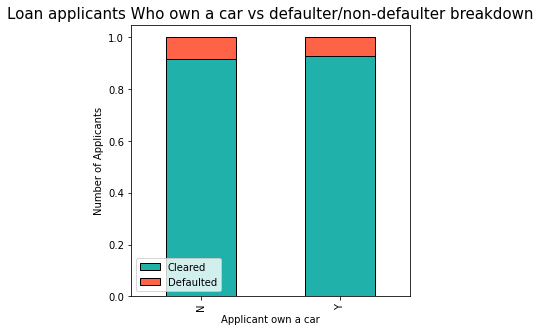

In [27]:

pivot = pd.pivot(data=df_car,index=['FLAG_OWN_CAR'],columns=['TARGET'],values='Count')
#ref : https://medium.com/@jb.ranchana/easy-way-to-create-stacked-bar-graphs-from-dataframe-19cc97c86fe3
ax = pivot.plot.bar(color =['lightseagreen', 'tomato'], figsize=(5,5),width=0.5,edgecolor='black',stacked=True)
ax.set_title('Loan applicants Who own a car vs defaulter/non-defaulter breakdown', fontsize=15)
# ax.xlabel('Applicant Occupation Type')
# ax.xlabel('Number of Applicants')
ax.set(xlabel='Applicant own a car', ylabel='Number of Applicants')
ax.legend(['Cleared','Defaulted'])
# ax.show()

### Does owning a house make a difference ? 

In [28]:
df_house = application_train[['FLAG_OWN_REALTY','TARGET']]

df_house = df_house.value_counts().reset_index(name='Count')

df_house

,FLAG_OWN_REALTY,TARGET,Count
0,Y,0,196329
1,N,0,86357
2,Y,1,16983
3,N,1,7842


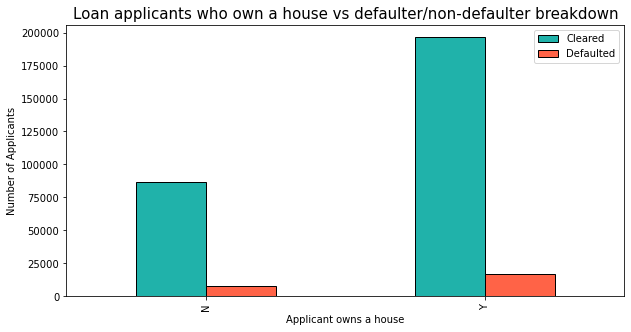

In [29]:
pivot = pd.pivot(data=df_house,index=['FLAG_OWN_REALTY'],columns=['TARGET'],values='Count')
#ref : https://medium.com/@jb.ranchana/easy-way-to-create-stacked-bar-graphs-from-dataframe-19cc97c86fe3
ax = pivot.plot.bar(color =['lightseagreen', 'tomato'], figsize=(10,5),width=0.5,edgecolor='black')
ax.set_title('Loan applicants who own a house vs defaulter/non-defaulter breakdown', fontsize=15)
# ax.xlabel('Applicant Occupation Type')
# ax.xlabel('Number of Applicants')
ax.set(xlabel='Applicant owns a house', ylabel='Number of Applicants')
ax.legend(['Cleared','Defaulted'])
# ax.show()

### Here we can observe a trend that is interstingly the opposite of our previous result, wherein people not having cars applied more for loans, but in this case, people who own a house tend to have applied for loans more often.  

### NOrmalized Version (To Remove)

In [30]:
df_house = application_train[['FLAG_OWN_REALTY','TARGET']]

df_house = df_house.groupby('FLAG_OWN_REALTY')['TARGET'].value_counts(normalize=True).reset_index(name='Count')

df_house

,FLAG_OWN_REALTY,TARGET,Count
0,N,0,0.916751
1,N,1,0.083249
2,Y,0,0.920384
3,Y,1,0.079616


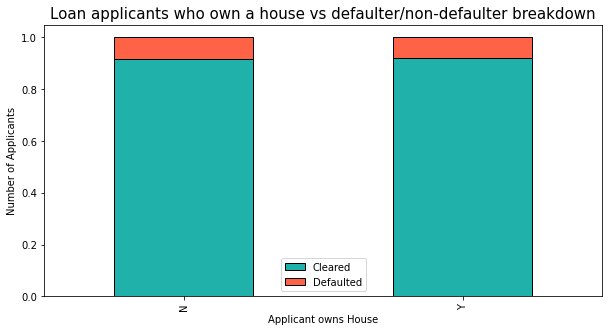

In [31]:
pivot = pd.pivot(data=df_house,index=['FLAG_OWN_REALTY'],columns=['TARGET'],values='Count')
#ref : https://medium.com/@jb.ranchana/easy-way-to-create-stacked-bar-graphs-from-dataframe-19cc97c86fe3
ax = pivot.plot.bar(color =['lightseagreen', 'tomato'], figsize=(10,5),width=0.5,edgecolor='black',stacked=True)
ax.set_title('Loan applicants who own a house vs defaulter/non-defaulter breakdown', fontsize=15)
# ax.xlabel('Applicant Occupation Type')
# ax.xlabel('Number of Applicants')
ax.set(xlabel='Applicant owns House', ylabel='Number of Applicants')
ax.legend(['Cleared','Defaulted'])
# ax.show()

### Let us see if age is a factor in repayment of loans

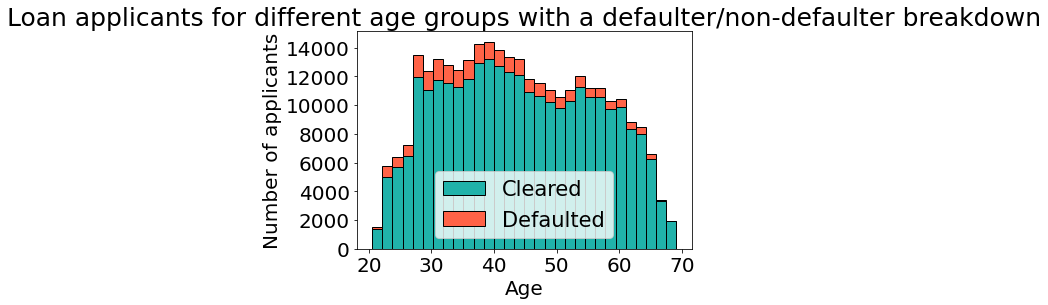

In [32]:
# Reference : https://stackoverflow.com/questions/24594511/creating-stacked-histogram-with-pandas-dataframes-data-python
plt.hist([application_train[(application_train['TARGET']==0)]['DAYS_BIRTH']/-365,application_train[application_train['TARGET']==1]['DAYS_BIRTH']/-365],bins=30,stacked=True,edgecolor='black',label=['Cleared','Defaulted'],color =['lightseagreen', 'tomato'])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=21)
plt.rcParams["figure.figsize"] = (15,8)
plt.title('Loan applicants for different age groups with a defaulter/non-defaulter breakdown',fontsize=25)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Number of applicants',fontsize=20)
plt.show()

### Based on the ages it is evident that people from the ages of 28 - 45 have the highes rate of defaulting on their loan payments and that reduces with the increase in age, almost becoming zero past the age of 65.

### Let us perform the same kind of exploration with respect to the occupation of applicants

In [33]:
df_profession = application_train[['OCCUPATION_TYPE','TARGET']]

df_profession = df_profession.value_counts().reset_index(name='Count')

pivot = pd.pivot(data=df_profession,index=['OCCUPATION_TYPE'],columns=['TARGET'],values='Count')

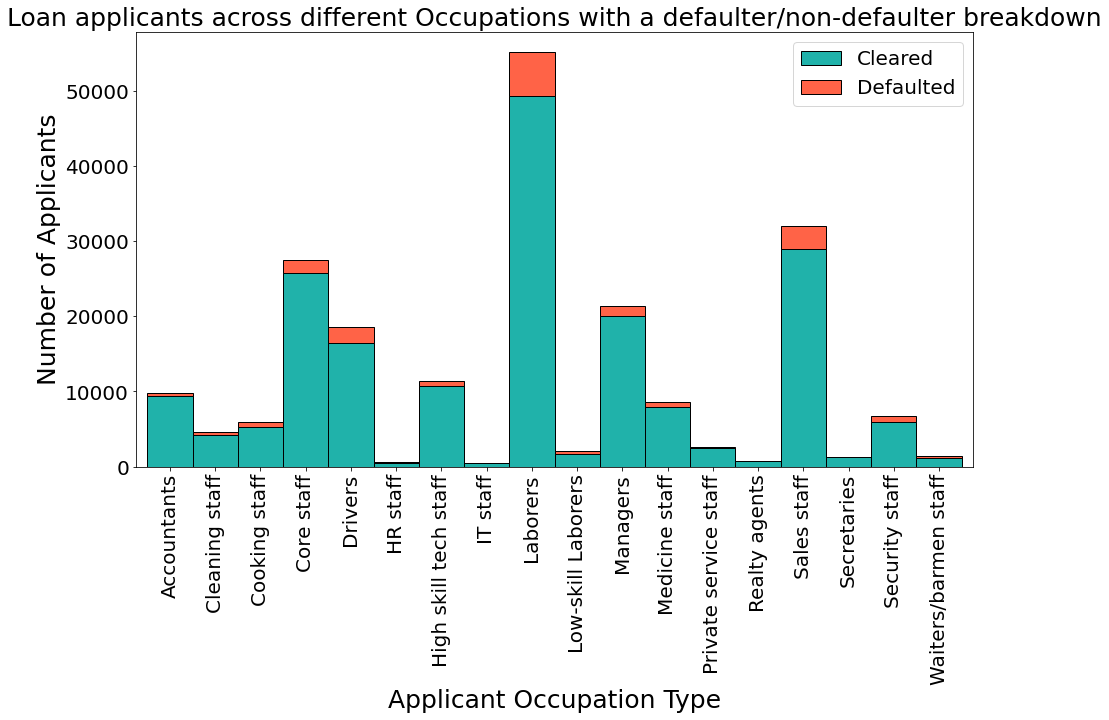

In [34]:
#ref : https://medium.com/@jb.ranchana/easy-way-to-create-stacked-bar-graphs-from-dataframe-19cc97c86fe3
ax = pivot.plot.bar(stacked=True, color =['lightseagreen', 'tomato'], figsize=(15,8),width=1,edgecolor='black',label=['Cleared','Defaulted'])
ax.set_title('Loan applicants across different Occupations with a defaulter/non-defaulter breakdown',size=25)

ax.set(xlabel='Applicant Occupation Type', ylabel='Number of Applicants')
ax.set_xlabel('Applicant Occupation Type', size = 25)
ax.set_ylabel('Number of Applicants', size = 25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax.legend(['Cleared','Defaulted'],fontsize=20)


### Here we can clearly observe that there are a massive amount of applicants who are laborers and they have a large amount of defaulters. 

### IT and HR staff and Realty agents seem to have the least amount of loan applicants. 

In [35]:
df_profession = application_train[['OCCUPATION_TYPE','TARGET']]

df_profession = df_profession.groupby('OCCUPATION_TYPE')['TARGET'].value_counts(normalize=True).reset_index(name='Count')

pivot = pd.pivot(data=df_profession,index=['OCCUPATION_TYPE'],columns=['TARGET'],values='Count')

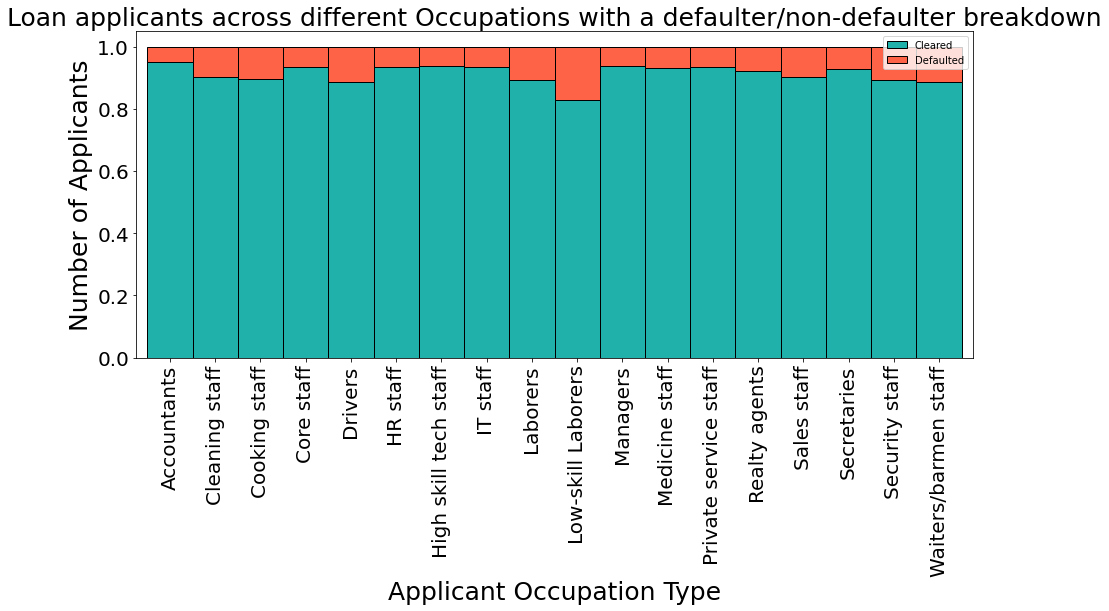

In [36]:
#ref : https://medium.com/@jb.ranchana/easy-way-to-create-stacked-bar-graphs-from-dataframe-19cc97c86fe3
ax = pivot.plot.bar(stacked=True, color =['lightseagreen', 'tomato'], figsize=(15,6),width=1,edgecolor='black',label=['Cleared','Defaulted'])
ax.set_title('Loan applicants across different Occupations with a defaulter/non-defaulter breakdown', fontsize=25)
# ax.xlabel('Applicant Occupation Type')
# ax.xlabel('Number of Applicants')
ax.set(xlabel='Applicant Occupation Type', ylabel='Number of Applicants')
ax.set_xlabel('Applicant Occupation Type', size = 25)
ax.set_ylabel('Number of Applicants', size = 25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax.legend(['Cleared','Defaulted'])
# ax.show()

### Here we can clearly observe that there are a massive amount of applicants who are laborers and they have a large amount of defaulters but the largest percentage of defaulters tend to belong to the low-skilled laborers.


In [63]:
# imports
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
from time import time
from scipy import stats
import json

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import make_scorer, roc_auc_score, log_loss, accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix

from IPython.display import display, Math, Latex

In [64]:
df = pd.read_csv('/root/shared/Desktop/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission/application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [65]:
y = df['TARGET']
x = df.drop(columns='TARGET')

In [66]:
results = pd.DataFrame(columns=["ExpID", "Cross fold train accuracy", "Test Accuracy", "Validation Accuracy", "AUC", "Train Time(s)", "Test Time(s)", "Validation Time(s)","Experiment description"])

def pct(x):
    return round(100*x,1)


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


def returnModel(x,y,results,description_text):
    num_attribs = []
    cat_attribs = []

    for col in x.columns.tolist():
        if x[col].dtype in (['int','float']):
            num_attribs.append(col)
        else:
            cat_attribs.append(col)
            
    le_dict = {}
    for col in x.columns.tolist():
        if df[col].dtype == 'object':
            le = LabelEncoder()
            x[col] = x[col].fillna("NULL")
            x[col] = le.fit_transform(x[col])
            le_dict['le_{}'.format(col)] = le

    num_pipeline =Pipeline([('selector',DataFrameSelector(num_attribs)),
                           ('scaler', StandardScaler()),
                          ('imputer', SimpleImputer(strategy = 'median'))
                           ])
    
    
    cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
    
    
    full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ]) 
    
    np.random.seed(42)
    full_pipeline_with_predictor = Pipeline([
            ("preparation", num_pipeline),
            ("linear", LogisticRegression(random_state=42))
        ])
            
    # split 20% test data with random seed set to 42 for correct results
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
    print("train data set: ")
    print(x_train.shape,y_train.shape)
    print("test data set: ")
    print(x_test.shape,y_test.shape)
    print("validation data set: ")
    print(x_valid.shape,y_valid.shape)
    
            
    start = time()
    full_pipeline_with_predictor.fit(x_train, y_train)
    np.random.seed(42)

    cv30Splits = ShuffleSplit(n_splits = 30, test_size = 0.3, random_state = 0)
    logit_scores = cross_val_score(full_pipeline_with_predictor, x_train, y_train, cv = cv30Splits)              
    logit_score_train = logit_scores.mean()
    train_time = np.round(time() - start, 4)

    # Time and score test predictions
    start = time()
    logit_score_test  = full_pipeline_with_predictor.score(x_test, y_test)
    test_time = np.round(time() - start, 4)
    
    start = time()
    logit_score_valid  = full_pipeline_with_predictor.score(x_valid, y_valid)
    valid_time = np.round(time() - start, 4)
    
    AUC = roc_auc_score(y_test,full_pipeline_with_predictor.predict(x_test))
    print("AUC is {}".format(AUC))
    print("\n............\n")
    print("Confusion Matrix: {}".format(confusion_matrix(y_test, full_pipeline_with_predictor.predict(x_test))))
    
    no_of_inputs = x.shape[1]
    
    temp_df = pd.DataFrame()
    temp_df = temp_df.append(pd.Series(["Baseline with {} inputs".format(no_of_inputs), pct(logit_score_train), pct(logit_score_test), pct(logit_score_valid),
                  AUC, train_time, test_time, valid_time, "{} - Untuned LogisticRegression".format(description_text)]),ignore_index=True)
    temp_df.columns = results.columns
    
    results = results.append(temp_df,ignore_index=True)
    
    return le_dict, full_pipeline_with_predictor, results

In [67]:
le_dict, full_pipeline_with_predictor, results = returnModel(x,y,results,"Unbalanced Dataset")

train data set: 
(196806, 121) (196806,)
test data set: 
(61503, 121) (61503,)
validation data set: 
(49202, 121) (49202,)
AUC is 0.5036433706059472

............

Confusion Matrix: [[56509    45]
 [ 4909    40]]


In [68]:
results

,ExpID,Cross fold train accuracy,Test Accuracy,Validation Accuracy,AUC,Train Time(s),Test Time(s),Validation Time(s),Experiment description
0,Baseline with 121 inputs,92.0,91.9,91.8,0.503643,213.1051,0.4025,0.1991,Unbalanced Dataset - Untuned LogisticRegression


In [69]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [70]:
final_data = df[df['TARGET']==1]
final_data = final_data.append(df[df['TARGET']==0].reset_index(drop=True).sample(n = 50000))
print(final_data.shape)
final_data.head()

(74825, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,NaN,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0265,NaN,0.0094,NaN,0.0000,0.0168,0.0092,0.9732,NaN,NaN,0.0000,0.0690,0.0417,NaN,0.0271,NaN,0.0083,NaN,0.0000,0.0167,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0270,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0085,Wooden,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.306841,0.320163,0.1309,0.1250,0.9960,0.9456,0.0822,0.16,0.1379,0.2500,0.2917,0.0142,0.1059,0.1267,0.0039,0.0078,0.1334,0.1297,0.9960,0

In [71]:
x = final_data.drop(columns='TARGET')
y = final_data['TARGET']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, shuffle=True, random_state=42)
print(x_train.shape,y_train.shape)

(59860, 121) (59860,)


In [72]:
le_dict, full_pipeline_with_predictor, results4 = returnModel(x,y,results,"50000 non-defaulters Balanced Dataset")

train data set: 
(47888, 121) (47888,)
test data set: 
(14965, 121) (14965,)
validation data set: 
(11972, 121) (11972,)
AUC is 0.6281171560248269

............

Confusion Matrix: [[8912 1139]
 [3098 1816]]


In [73]:
results4

,ExpID,Cross fold train accuracy,Test Accuracy,Validation Accuracy,AUC,Train Time(s),Test Time(s),Validation Time(s),Experiment description
0,Baseline with 121 inputs,92.0,91.9,91.8,0.503643,213.1051,0.4025,0.1991,Unbalanced Dataset - Untuned LogisticRegression
1,Baseline with 121 inputs,71.6,71.7,71.9,0.628117,36.2038,0.0403,0.0454,50000 non-defaulters Balanced Dataset - Untune...


In [43]:
test_data_set = pd.read_csv('/root/shared/Desktop/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission/application_test.csv')
test_data_set.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [44]:
for col in test_data_set.columns.tolist():
    for le in le_dict:
        if col in le:
            test_data_set[col] = le_dict[le].fit_transform(test_data_set[col])

In [45]:
output_data = test_data_set[['SK_ID_CURR']]
output_data['TARGET'] = pd.Series(full_pipeline_with_predictor.predict(test_data_set).tolist())

In [46]:
output_data['TARGET'].value_counts()

0    48676
1       68
Name: TARGET, dtype: int64

In [47]:
output_data.to_csv('/root/shared/Desktop/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission/output.csv', index=False)

In [48]:
results = pd.DataFrame(columns=["ExpID", "Cross fold train accuracy", "Test Accuracy", "Validation Accuracy", "AUC", "Train Time(s)", "Test Time(s)", "Validation Time(s)","Experiment description"])

def pct(x):
    return round(100*x,1)


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


def returnModel(x,y,results,description_text):
    num_attribs = []
    cat_attribs = []

    for col in x.columns.tolist():
        if x[col].dtype in (['int','float']):
            num_attribs.append(col)
        else:
            cat_attribs.append(col)
            
    le_dict = {}
    for col in x.columns.tolist():
        if df[col].dtype == 'object':
            le = LabelEncoder()
            x[col] = x[col].fillna("NULL")
            x[col] = le.fit_transform(x[col])
            le_dict['le_{}'.format(col)] = le

    num_pipeline =Pipeline([('selector',DataFrameSelector(num_attribs)),
                           ('scaler', StandardScaler()),
                          ('imputer', SimpleImputer(strategy = 'median'))
                           ])
    
    
    cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
    
    
    full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ]) 
    
    np.random.seed(42)
    full_pipeline_with_predictor = Pipeline([
            ("preparation", num_pipeline),
            ("linear", DecisionTreeClassifier(random_state=42))
        ])
            
    # split 20% test data with random seed set to 42 for correct results
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
    print("train data set: ")
    print(x_train.shape,y_train.shape)
    print("test data set: ")
    print(x_test.shape,y_test.shape)
    print("validation data set: ")
    print(x_valid.shape,y_valid.shape)
    
            
    start = time()
    full_pipeline_with_predictor.fit(x_train, y_train)
    np.random.seed(42)

    cv30Splits = ShuffleSplit(n_splits = 30, test_size = 0.3, random_state = 0)
    logit_scores = cross_val_score(full_pipeline_with_predictor, x_train, y_train, cv = cv30Splits)              
    logit_score_train = logit_scores.mean()
    train_time = np.round(time() - start, 4)

    # Time and score test predictions
    start = time()
    logit_score_test  = full_pipeline_with_predictor.score(x_test, y_test)
    test_time = np.round(time() - start, 4)
    
    start = time()
    logit_score_valid  = full_pipeline_with_predictor.score(x_valid, y_valid)
    valid_time = np.round(time() - start, 4)
    
    AUC = roc_auc_score(y_test,full_pipeline_with_predictor.predict(x_test))
    print("AUC is {}".format(AUC))
    print("\n............\n")
    print("Confusion Matrix: {}".format(confusion_matrix(y_test, full_pipeline_with_predictor.predict(x_test))))
    
    no_of_inputs = x.shape[1]
    
    temp_df = pd.DataFrame()
    temp_df = temp_df.append(pd.Series(["Baseline with {} inputs".format(no_of_inputs), pct(logit_score_train), pct(logit_score_test), pct(logit_score_valid),
                  AUC, train_time, test_time, valid_time, "{} - Untuned Decision Tree".format(description_text)]),ignore_index=True)
    temp_df.columns = results.columns
    
    results = results.append(temp_df,ignore_index=True)
    
    return le_dict, full_pipeline_with_predictor, results

In [49]:
le_dict, full_pipeline_with_predictor, results1 = returnModel(x,y,results,"Unbalanced Dataset")

train data set: 
(196806, 121) (196806,)
test data set: 
(61503, 121) (61503,)
validation data set: 
(49202, 121) (49202,)
AUC is 0.538009268610628

............

Confusion Matrix: [[51517  5037]
 [ 4132   817]]


In [50]:
results1

,ExpID,Cross fold train accuracy,Test Accuracy,Validation Accuracy,AUC,Train Time(s),Test Time(s),Validation Time(s),Experiment description
0,Baseline with 121 inputs,85.1,85.1,84.9,0.538009,473.1098,0.4028,0.2379,Unbalanced Dataset - Untuned Decision Tree


In [51]:
for col in test_data_set.columns.tolist():
    for le in le_dict:
        if col in le:
            test_data_set[col] = le_dict[le].fit_transform(test_data_set[col])

In [52]:
output_data = test_data_set[['SK_ID_CURR']]
output_data['TARGET'] = pd.Series(full_pipeline_with_predictor.predict(test_data_set).tolist())

In [53]:
output_data['TARGET'].value_counts()

0    41798
1     6946
Name: TARGET, dtype: int64

In [54]:
output_data.to_csv('/root/shared/Desktop/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission/output1.csv', index=False)

In [55]:
final_data = df[df['TARGET']==1]
final_data = final_data.append(df[df['TARGET']==0].reset_index(drop=True).sample(n = 75000))
print(final_data.shape)
final_data.head()

(99825, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,NaN,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0265,NaN,0.0094,NaN,0.0000,0.0168,0.0092,0.9732,NaN,NaN,0.0000,0.0690,0.0417,NaN,0.0271,NaN,0.0083,NaN,0.0000,0.0167,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0270,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0085,Wooden,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.306841,0.320163,0.1309,0.1250,0.9960,0.9456,0.0822,0.16,0.1379,0.2500,0.2917,0.0142,0.1059,0.1267,0.0039,0.0078,0.1334,0.1297,0.9960,0

In [56]:
x = final_data.drop(columns='TARGET')
y = final_data['TARGET']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, shuffle=True, random_state=42)
print(x_train.shape,y_train.shape)

(79860, 121) (79860,)


In [57]:
le_dict, full_pipeline_with_predictor, results = returnModel(x,y,results,"50000 non-defaulters Balanced Dataset")

train data set: 
(63888, 121) (63888,)
test data set: 
(19965, 121) (19965,)
validation data set: 
(15972, 121) (15972,)
AUC is 0.5610700913805244

............

Confusion Matrix: [[11528  3448]
 [ 3231  1758]]


In [58]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [59]:
final_data = df[df['TARGET']==1]
final_data = final_data.append(df[df['TARGET']==0].reset_index(drop=True).sample(n = 50000))
print(final_data.shape)
final_data.head()

(74825, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,NaN,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0265,NaN,0.0094,NaN,0.0000,0.0168,0.0092,0.9732,NaN,NaN,0.0000,0.0690,0.0417,NaN,0.0271,NaN,0.0083,NaN,0.0000,0.0167,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0270,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0085,Wooden,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.306841,0.320163,0.1309,0.1250,0.9960,0.9456,0.0822,0.16,0.1379,0.2500,0.2917,0.0142,0.1059,0.1267,0.0039,0.0078,0.1334,0.1297,0.9960,0

In [60]:
x = final_data.drop(columns='TARGET')
y = final_data['TARGET']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, shuffle=True, random_state=42)
print(x_train.shape,y_train.shape)

(59860, 121) (59860,)


In [61]:
le_dict, full_pipeline_with_predictor, results3 = returnModel(x,y,results,"50000 non-defaulters Balanced Dataset")

train data set: 
(47888, 121) (47888,)
test data set: 
(14965, 121) (14965,)
validation data set: 
(11972, 121) (11972,)
AUC is 0.5790681099854317

............

Confusion Matrix: [[7114 2937]
 [2701 2213]]


In [62]:
results3

,ExpID,Cross fold train accuracy,Test Accuracy,Validation Accuracy,AUC,Train Time(s),Test Time(s),Validation Time(s),Experiment description
0,Baseline with 121 inputs,67.0,66.5,67.2,0.561070,101.1529,0.0700,0.0996,50000 non-defaulters Balanced Dataset - Untune...
1,Baseline with 121 inputs,61.7,62.3,61.4,0.579068,69.0101,0.0487,0.0381,50000 non-defaulters Balanced Dataset - Untune...
